In [92]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)

In [2]:
gmx_surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
namd_surface_areas = ['SA19','SA19-2', 'SA19-3', 
                   'SA19.5','SA19.5-2', 'SA19.5-3',
                   'SA20','SA20-2', 'SA20-3',
                   'SA20.5', 'SA20.5-2', 'SA20.5-3',
                   'SA21','SA21-2', 'SA21-3',
                   'SA22','SA22-2', 'SA22-3',
                   'SA23','SA23-2', 'SA23-3',
                   'SA24', 'SA24-2', 'SA24-3']
namd_filenames = ['step7.1', 'step7.2', 'step7.21', 'step7.3', 'step7.31', 'step7.32', 'step7.33', 'step7.34',
               'step7.35','step7.4', 'step7.41', 'step7.42', 'step7.43', 'step7.44', 'step7.45']
gmx_filenames = []
for g in range(1,21):
    gmx_filenames.append('step9_'+str(g))
filedir_g = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
filedir_n = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
logfiles_n = []
logfiles_g = []
trr_files = []
dcd_files = []

for area in namd_surface_areas:
    logchunk = []
    dcdchunk = []
    for i in namd_filenames:
        log = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        dcd = Path(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
        if log.exists():
            logchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.log')
        if dcd.exists():
            dcdchunk.append(filedir_n+area+'/charmm-gui/namd/'+i+'_production.dcd')
    if len(logchunk)>0:
        logfiles_n.append(logchunk)
        dcd_files.append(dcdchunk)
#xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
trr_files = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in gmx_surface_areas:
    xvgchunk = []
    trajchunk = []
    for i in range(1, 21):
        xvg = Path(filedir_g+area+'/step9_'+str(i)+'.xvg')
        traj = Path(filedir_g+area+'/step9_'+str(i)+'.trr')
        if xvg.exists():
            xvgchunk.append(filedir_g+area+'/step9_'+str(i)+'.xvg')
        if traj.exists():
            trajchunk.append(filedir_g+area+'/step9_'+str(i))
    #print(xvgchunk)
    for p, x in enumerate(xvgchunk):
        if p == 0:
            #arr = np.array(timesteps)
            #timesteps in nanoseconds
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]/1000
            #np.append(timesteps, new_ts)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #np.append(pressures, new_pr)
            #print(pressures)
        else:
            time = np.genfromtxt(x,dtype='float', skip_header=24)[:,0]/1000
            #print(time)
            timesteps = np.append(timesteps, time)
      #      #print(time)
      #      #t = time.tolist()
      #      timesteps.append(time)
      #      print(timesteps)
            pr = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            pressures = np.append(pressures, pr)
    if len(xvgchunk)>0:
        pres.append(70.5-np.array(pressures))
        times.append(timesteps)
        areas.append(area)
        logfiles_g.append(xvgchunk)
        trr_files.append(trajchunk)
print(trr_files)

[['/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-1_20ns/step9_1', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-1_20ns/step9_2'], ['/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_1', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_2', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_3', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_4', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_5', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_6', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_7', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_8', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_9', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_10', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_11', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/step9_12', '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA19-2_100ns/

In [3]:
selection = trr_files[0]
trrs = []
for s in selection:
    trrs.append(s+'.trr')
traj = md.load(trrs, top=selection[0]+'.gro')
print(traj)

<mdtraj.Trajectory with 2002 frames, 47628 atoms, 7669 residues, and unitcells>


In [61]:
poop = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'PALP']
print(np.array(poop))
laup = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'LAUP']
myrp = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'MYRP']
step = [atom.index for atom in traj.top.atoms if traj.xyz[0][atom.index][2] > 0 and atom.residue.name == 'STEP']

[ 6384  6385  6386 ..., 13981 13982 13983]


In [69]:
sel1 = traj.top.select("name 'C1'")
#print(sel1)
sel2 = traj.top.select('water')
sel3 = traj.top.select('resname SOD')

pairs = traj.top.select_pairs(poop, sel2)
lauppairs = traj.top.select_pairs(laup, sel2)
myrppairs = traj.top.select_pairs(myrp, sel2)
steppairs = traj.top.select_pairs(step, sel2)

In [107]:
hi = md.compute_rdf(traj[-1], pairs, r_range=(0.0, 10.0))
hi1 = md.compute_rdf(traj[-1], lauppairs, r_range=(0.0, 10.0))
hi2 = md.compute_rdf(traj[-1], myrppairs, r_range=(0.0, 10.0))
hi3 = md.compute_rdf(traj[-1], steppairs, r_range=(0.0, 10.0))

Text(0,0.5,u'G(r)')

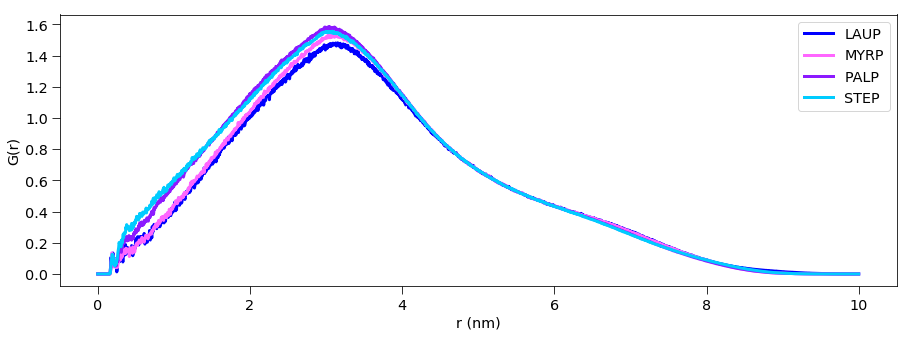

In [108]:
#print(hi)
plt.errorbar(hi1[0],hi1[1], c=pal[0], label='LAUP', lw=3)
plt.errorbar(hi2[0],hi2[1], c=pal[4], label='MYRP', lw=3)
plt.errorbar(hi[0],hi[1], c=pal[1], label='PALP', lw=3)
plt.errorbar(hi3[0],hi3[1], c=pal[3], label='STEP', lw=3)
plt.legend(loc=1)
plt.xlabel('r (nm)')
plt.ylabel('G(r)')

In [26]:
pairs2 = traj.top.select_pairs(sel1, sel3)

In [27]:
hi2 = md.compute_rdf(traj[-1], pairs2)

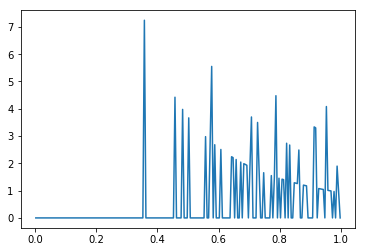

In [28]:
plt.plot(hi2[0],hi2[1])

In [72]:
bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]